In [ ]:
# 7. Data Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('credit_card.csv')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop non-useful identifiers
df.drop(['Credit_card_number', 'Expiry', 'Security_code'], axis=1, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Encode 'Profession'
le = LabelEncoder()
df['Profession'] = le.fit_transform(df['Profession'])

# Scale 'Income'
scaler = StandardScaler()
df['Income'] = scaler.fit_transform(df[['Income']])

# Split data
X = df.drop('Fraud', axis=1)
y = df['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== #7 Data Preprocessing Completed ===")
print("Data shape after cleaning:", df.shape)
print("Sample data:\n", df.head())

=== #7 Data Preprocessing Completed ===
Data shape after cleaning: (10000, 3)
Sample data:
    Profession    Income  Fraud
0           0 -0.251496      1
1           0  1.060219      1
2           2  1.449243      1
3           2 -0.212864      1
4           0 -0.929357      0


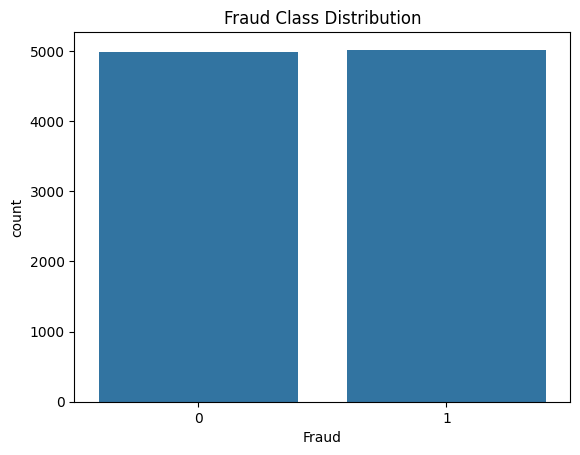

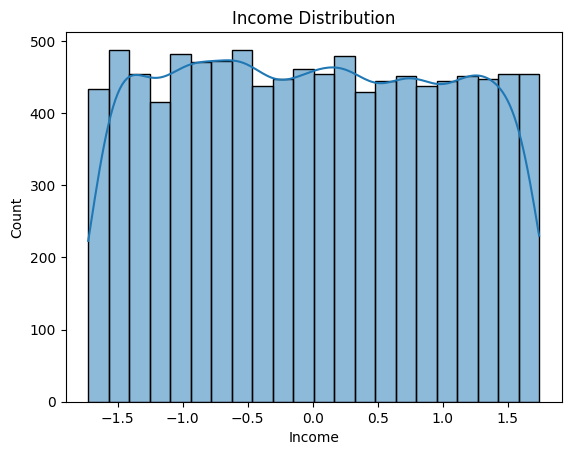

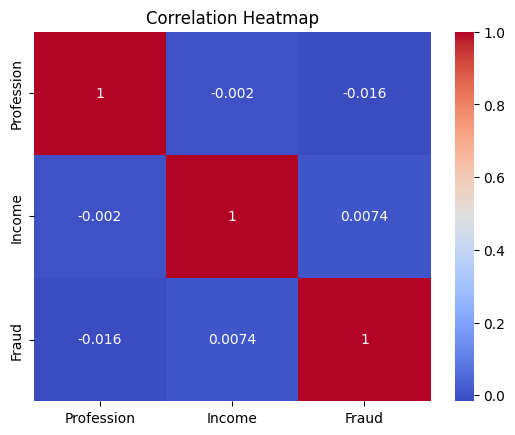

In [ ]:
# 8. Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Fraud distribution
sns.countplot(x='Fraud', data=df)
plt.title('Fraud Class Distribution')
plt.show()

# Income distribution
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 9. Feature Engineering

# Create Income level bins
df['Income_level'] = pd.cut(df['Income'], bins=3, labels=[0, 1, 2]).astype(int)

# Updated features
X = df[['Profession', 'Income', 'Income_level']]
y = df['Fraud']

# Final train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("=== #9 Feature Engineering Completed ===")
print("New features used for modeling:", X.columns.tolist())
print("Income level distribution:\n", df['Income_level'].value_counts())

=== #9 Feature Engineering Completed ===
New features used for modeling: ['Profession', 'Income', 'Income_level']
Income level distribution:
 Income_level
0    3382
1    3320
2    3298
Name: count, dtype: int64


In [ ]:
# 10. Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
log_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss')

# Train models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       995
           1       0.51      0.56      0.53      1005

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000

ROC AUC Score: 0.5052501312532813


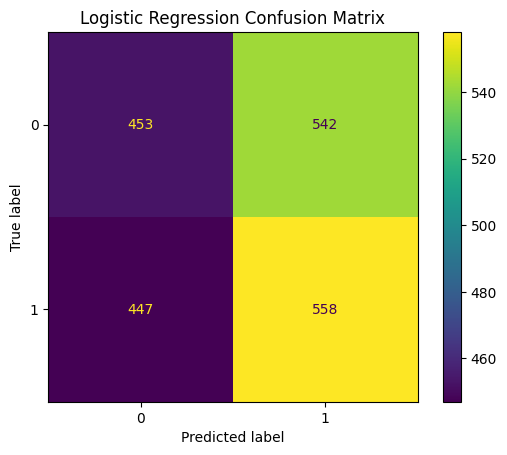

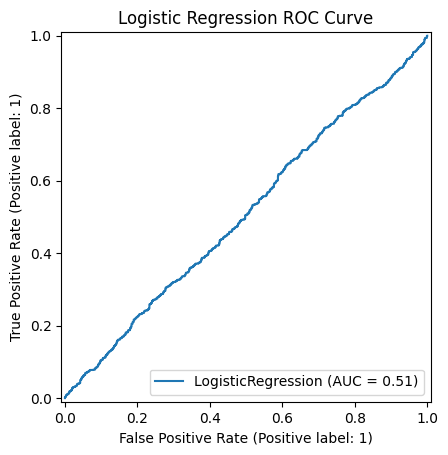

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       995
           1       0.49      0.51      0.50      1005

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

ROC AUC Score: 0.49193229830745766


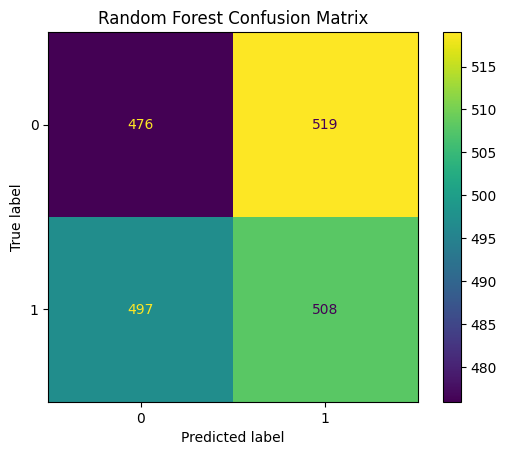

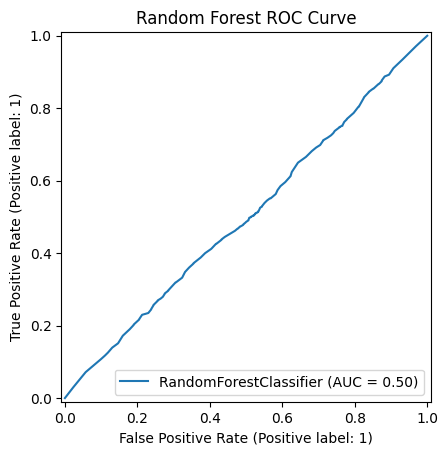

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       995
           1       0.50      0.48      0.49      1005

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

ROC AUC Score: 0.4960724018100452


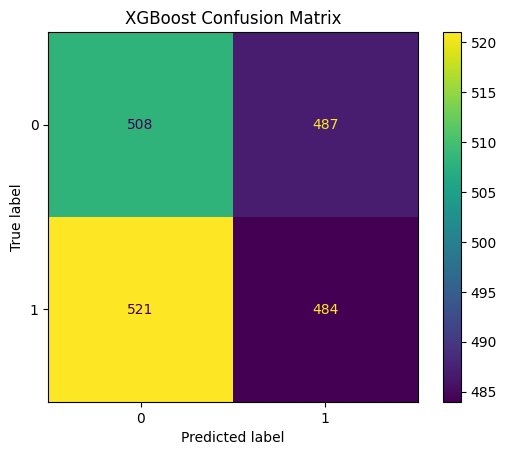

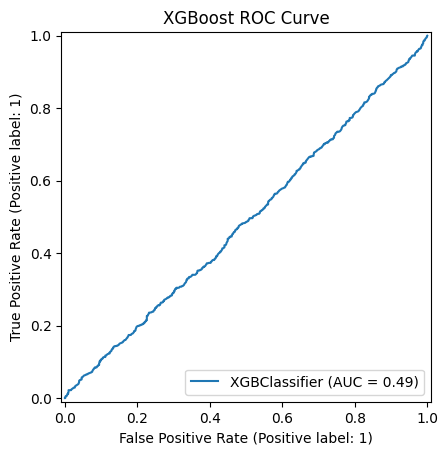

Deployment files saved: fraud_model.pkl, label_encoder.pkl


In [21]:
# 11. Model Evaluation

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import joblib

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

best_model = None
best_auc = 0

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC Score:", auc)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} ROC Curve")
    plt.show()

    if auc > best_auc:
        best_auc = auc
        best_model = model

# Save best model and label encoder for deployment
joblib.dump(best_model, 'fraud_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("Deployment files saved: fraud_model.pkl, label_encoder.pkl")